In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
df = pd.read_csv('ratings.csv')
df = df.drop('number of years after 1970 ', 1)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.drop(df[df['movieId'] != 551].index, inplace=True)

In [3]:
start = df['timestamp'].min()
end = df['timestamp'].max()
df2 = pd.DataFrame(columns=['timestamp','number_of_ratings'])
delta = datetime.timedelta(days=30)
i = 0
print(start)
print(end)
while start <= end:
    count = 0
    for t in df.timestamp:
        if start<=t<start+delta:
            count +=1
    df2.loc[i] = [start,count]
    i+=1
    start+= delta
   
    

1996-05-09 00:26:00
2019-10-26 06:51:04


Starting Decomposition

In [4]:
df2['number_of_ratings']=df2['number_of_ratings'].astype(float)

In [5]:
df2.set_index('timestamp',inplace=True)


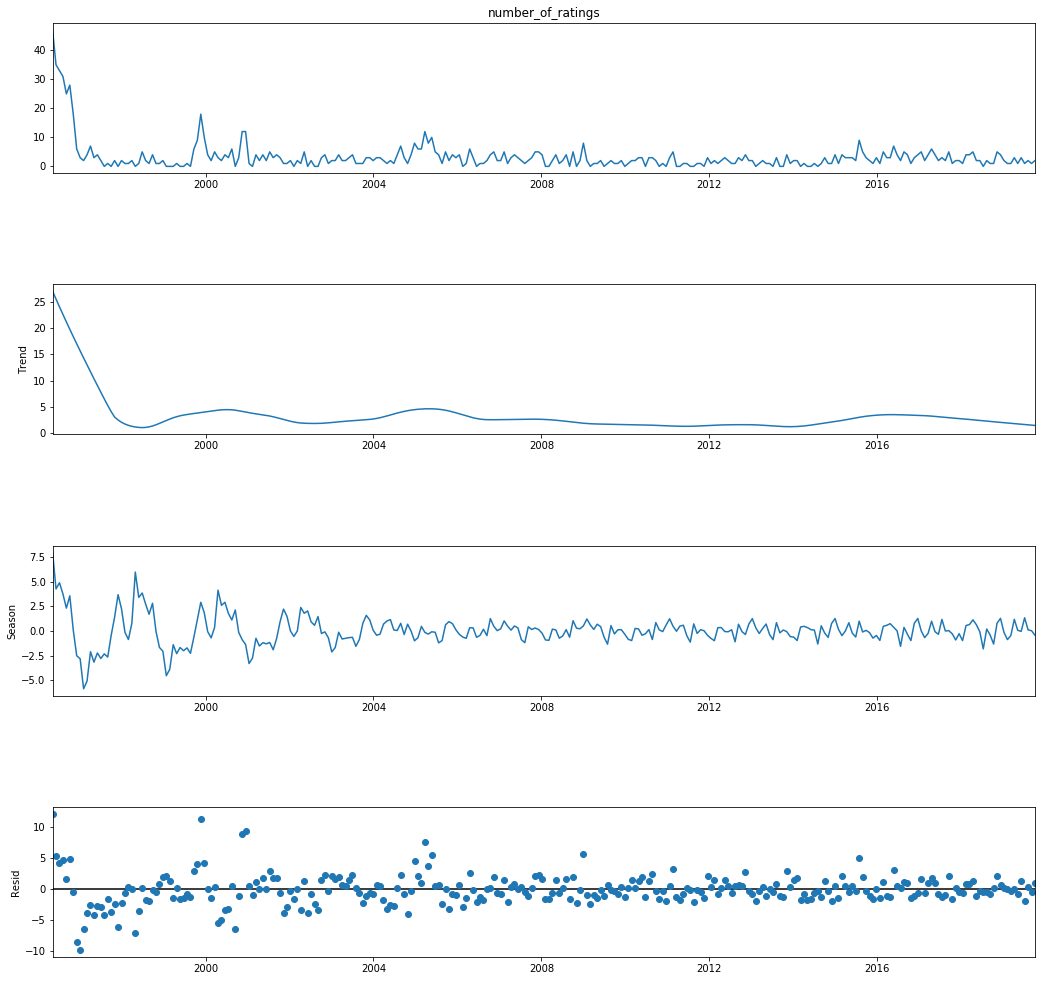

In [6]:
from statsmodels.tsa.seasonal import STL
pd.plotting.register_matplotlib_converters()
stl = STL(df2.number_of_ratings, seasonal=13,period=24)
res=stl.fit()
fig=res.plot()
fig.set_size_inches(16, 16)


In [7]:
rolling = df2.rolling(window=3)

In [8]:
rolling_mean = rolling.mean()

,number_of_ratings
timestamp,
1996-05-09 00:26:00,NaN
1996-06-08 00:26:00,NaN
1996-07-08 00:26:00,38.333333


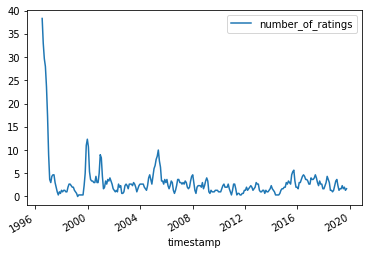

In [13]:
rolling_mean.plot()
rolling_mean.head(3)

Coeficients:[[-0.01710049]
 [ 5.67807802]]


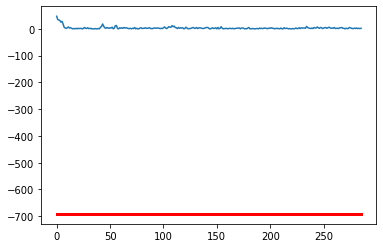

In [17]:
X = [i%365 for i in range(0,len(df2))]
y = df2.values
degree = 1
coef = np.polyfit(X,y,degree)
print("Coeficients:%s"%coef)
curve = list()
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
plt.plot(df2.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

In [20]:
df2.head

<bound method NDFrame.head of                      number_of_ratings
timestamp                             
1996-05-09 00:26:00               47.0
1996-06-08 00:26:00               35.0
1996-07-08 00:26:00               33.0
1996-08-07 00:26:00               31.0
1996-09-06 00:26:00               25.0
...                                ...
2019-06-08 00:26:00                3.0
2019-07-08 00:26:00                1.0
2019-08-07 00:26:00                2.0
2019-09-06 00:26:00                1.0
2019-10-06 00:26:00                2.0

[286 rows x 1 columns]>